# Labor Data Tutorial: Using the FRED API with Python

## Pulling labor market data from FRED

In this tutorial we download data on the US labor market to characterize the job creation/destruction cycle and the unemployment rate.  We use the same procedures to access FRED API as described in <a href="gdp-data-tutorial.html">GDP Data Tutorial</a>.  Let's begin by searching for the labor market data we are interested in using `fred.search('')`

In [39]:
import pandas as pd
from fredapi import Fred

fred = Fred(api_key='9c70445138df124be4928605b7e08bd4')
fred.search('employment')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
PAYEMS,PAYEMS,2025-09-30,2025-09-30,"All Employees, Total Nonfarm",1939-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-09-05 07:53:01-05:00,86,"All Employees: Total Nonfarm, commonly known a..."
PAYNSA,PAYNSA,2025-09-30,2025-09-30,"All Employees, Total Nonfarm",1939-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2025-09-05 07:52:02-05:00,52,"All Employees: Total Nonfarm, commonly known a..."
LES1252881600Q,LES1252881600Q,2025-09-30,2025-09-30,Employed full time: Median usual weekly real e...,1979-01-01,2025-04-01,Quarterly,Q,1982-84 CPI Adjusted Dollars,1982-84 CPI Adjusted $,Seasonally Adjusted,SA,2025-07-22 09:02:04-05:00,80,Data measure usual weekly earnings of wage and...
LEU0252881600A,LEU0252881600A,2025-09-30,2025-09-30,Employed full time: Median usual weekly real e...,1979-01-01,2024-01-01,Annual,A,1982-84 CPI Adjusted Dollars,1982-84 CPI Adjusted $,Not Seasonally Adjusted,NSA,2025-01-22 09:05:05-06:00,37,Data measure usual weekly earnings of wage and...
LEU0252881600Q,LEU0252881600Q,2025-09-30,2025-09-30,Employed full time: Median usual weekly real e...,1979-01-01,2025-04-01,Quarterly,Q,1982-84 CPI Adjusted Dollars,1982-84 CPI Adjusted $,Not Seasonally Adjusted,NSA,2025-07-22 09:03:24-05:00,25,Data measure usual weekly earnings of wage and...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IPUKN5239L201000000,IPUKN5239L201000000,2025-09-30,2025-09-30,Hours Worked for Finance and Insurance: Other ...,1988-01-01,2024-01-01,Annual,A,Percent Change from Year Ago,% Chg. from Yr. Ago,Not Seasonally Adjusted,NSA,2025-04-24 15:25:36-05:00,1,Labor hours are measured as annual hours worke...
BFPBF4QTOTALNSAHI,BFPBF4QTOTALNSAHI,2025-09-30,2025-09-30,Projected Business Formations Within Four Quar...,2004-07-01,2025-08-01,Monthly,M,Number,Number,Not Seasonally Adjusted,NSA,2025-09-11 11:05:44-05:00,1,The projected number of employer businesses th...
BFPBF4QTOTALSAHI,BFPBF4QTOTALSAHI,2025-09-30,2025-09-30,Projected Business Formations Within Four Quar...,2004-07-01,2025-08-01,Monthly,M,Number,Number,Seasonally Adjusted,SA,2025-09-11 11:05:40-05:00,1,The projected number of employer businesses th...


In [40]:
emp_pop_ratio = fred.get_series('EMRATIO') # Employment to population ratio
emp_pop_ratio_male = fred.get_series('LNS12300001') # Employment to population ratio men
emp_pop_ratio_female = fred.get_series('LNS12300002') # Employment to population ratio women
unemp3 = fred.get_series('UNRATE') # Official unemployment rate
unemp4 = fred.get_series('U4RATE') # Unemployed plus discouraged workers
unemp5 = fred.get_series('U5RATE') # Unemployed plus discouraged workers plus marginally attached workers
claims = fred.get_series('IC4WSA') # 4-week moving average of initial claims
unemp_weeks = fred.get_series('UEMPMEAN') # Average weeks unemployed

Let's begin by visualizing the data on aggregate unemployment:

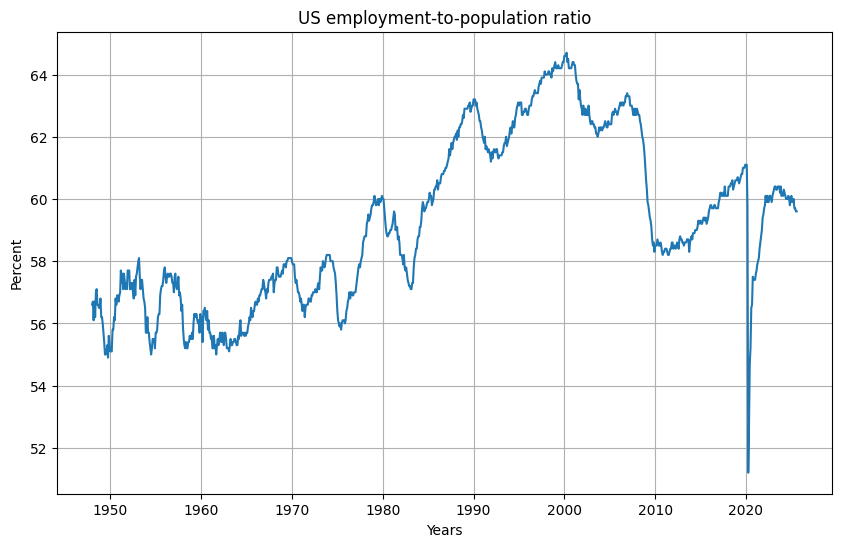

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot Employment 
plt.figure(figsize=(10, 6))
plt.plot(emp_pop_ratio, label="Employment to population ratio")

# Title the figure and label the axis
plt.xlabel("Years")
plt.ylabel("Percent")
plt.title("US employment-to-population ratio")
plt.grid(True)
plt.show()

Historically, the share of population who is employed rose dramatically between 1960 and 2000.  Besides this trend, we also observe some cylical behavior where there exist peaks and troughs.  

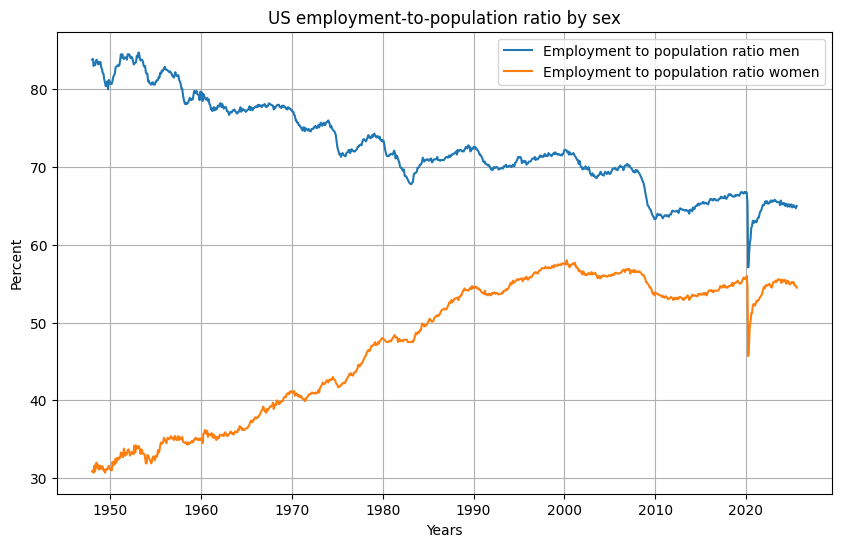

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot Employment 
plt.figure(figsize=(10, 6))
plt.plot(emp_pop_ratio_male, label="Employment to population ratio men")
plt.plot(emp_pop_ratio_female, label="Employment to population ratio women")

# Title the figure and label the axis
plt.xlabel("Years")
plt.ylabel("Percent")
plt.title("US employment-to-population ratio by sex")
plt.grid(True)
plt.legend()
plt.show()

There is a clear pattern: female employment has been on the rise since the 1950s while male employment has fallen.  There seemed to be a convergence happening until around 2000 at which point the two series begin to comove rather than diverge.

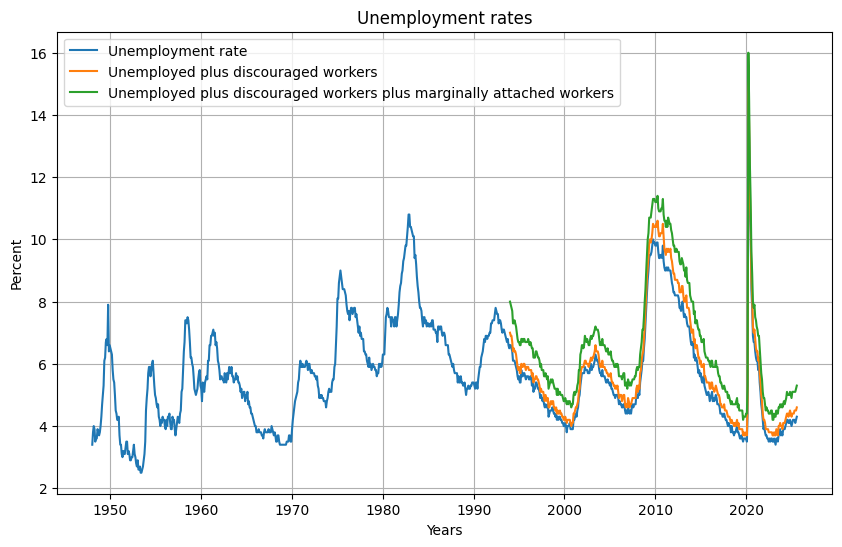

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot Unemployment
plt.figure(figsize=(10, 6))
plt.plot(unemp3, label="Unemployment rate")
plt.plot(unemp4, label="Unemployed plus discouraged workers")
plt.plot(unemp5, label="Unemployed plus discouraged workers plus marginally attached workers")

# Title the figure and label the axis
plt.xlabel("Years")
plt.ylabel("Percent")
plt.title("Unemployment rates")
plt.grid(True)
plt.legend()
plt.show()

Next we want to demonstrate the bathtub logic.  We want to plot the series...and observe their comovement over the business cycle.  To do so, first we should re-base each series to an index.  

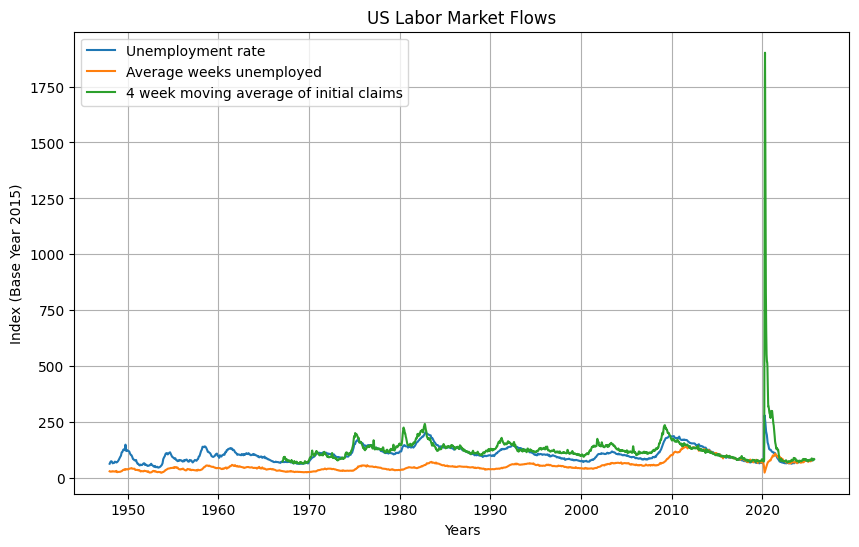

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose a base year
base_year = "2015"

# Function to rebase a series
def rebase(series, year):
    base = series.loc[year].mean()   # average over year
    return series / base * 100

# Rebase each separately
unemp3_idx = rebase(unemp3, base_year)
unemp_weeks_idx = rebase(unemp_weeks, base_year)
claims_idx = rebase(claims, base_year)

# Plot Employment 
plt.figure(figsize=(10, 6))
plt.plot(unemp3_idx, label="Unemployment rate")
plt.plot(unemp_weeks_idx, label="Average weeks unemployed")
plt.plot(claims_idx, label="4 week moving average of initial claims")


# Title the figure and label the axis
plt.xlabel("Years")
plt.ylabel("Index (Base Year 2015)")
plt.title("US Labor Market Flows")
plt.grid(True)
plt.legend()
plt.show()

We can see that Covid caused unprecedented levels of initial claims.  To get a cleaner picture, let's zoom into the period 1970-2019.

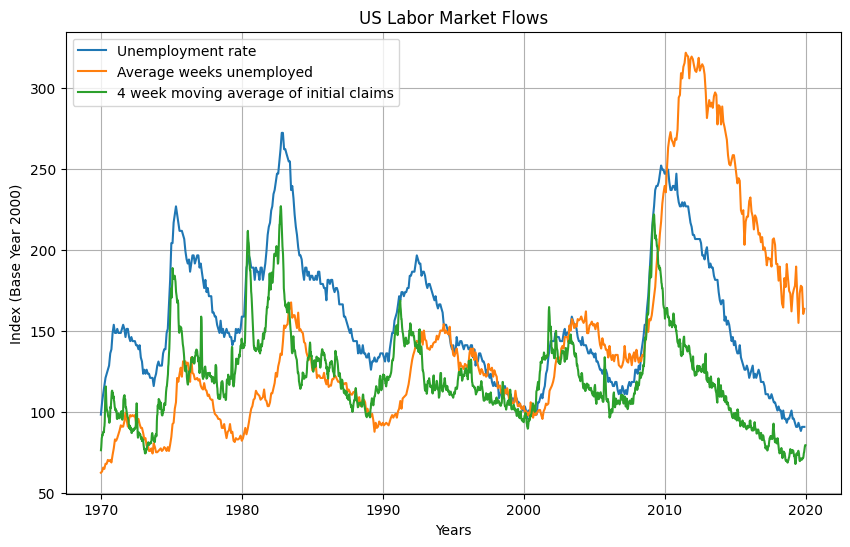

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose a base year
base_year = "2000"

# Function to rebase a series
def rebase(series, year):
    base = series.loc[year].mean()   # average over year
    return series / base * 100

# Rebase each separately
unemp3_idx = rebase(unemp3, base_year)
unemp_weeks_idx = rebase(unemp_weeks, base_year)
claims_idx = rebase(claims, base_year)

# Plot Employment 
start, end = "1970", "2019"
plt.figure(figsize=(10, 6))
plt.plot(unemp3_idx[start:end], label="Unemployment rate")
plt.plot(unemp_weeks_idx[start:end], label="Average weeks unemployed")
plt.plot(claims_idx[start:end], label="4 week moving average of initial claims")


# Title the figure and label the axis
plt.xlabel("Years")
plt.ylabel("Index (Base Year 2000)")
plt.title("US Labor Market Flows")
plt.grid(True)
plt.legend()
plt.show()

This illustrates the bathtub logic: First claims peak, then unemployment peaks, then duration peaks. First the bathtub fills quickly, then, after some time, it begins to drain; but as it's happening, those left in the tub have been there longer and longer.

We can go further and compute the actual rates at which workers transition from being unemployed to being employed.  This **job finding rate from unemployment** (U2E) is a key indicator of labor market flexibility and is used to infer the job finding probability.  Similarly, we can measure the rates at which workers transition from employment to unemployment (E2U) which is the **job separation rate**.  Also, we need a measure of the rate at which vacancies become filled jobs, called the **vacancy filling rate**.

There are two approaches for computing these rates:
1. <a href="https://www.bls.gov/jlt/" target="_blank">Job Openings and Labor Turnover Survey</a> (JOLTS) is a program of the <a href="https://www.bls.gov/" target="_blank">Bureau of Labor Statistics</a> (BLS) which collects employer-reported  job flows (vacancies new hires, quits, layoffs, and other separations).  Researchers commonly use the JOLTS hires and total separation series as direct monthly measures of gross flows.  for example, data series with FRED code `JTSHIL` provides the level of monthly hires, while `JTSVIL` gives the total level of monthly vacancies.  
2. The <a href="https://www.bls.gov/cps/" target="_blank">Current Population Survey</a> (CPS) is also a program of <a href="https://www.bls.gov/" target="_blank">Bureau of Labor Statistics</a> (BLS) which collects worker-reported job status (employed, unemployed, not in the labor force) as well as more detailed information about the reasons for workers' job status, demographic characteristics, and wages.
The rate can be derived from data collected by the  , available on FRED: the "Hired: Total Nonfarm" (JTSHIR) and "Unemployment Level" (UNEMPLOY) series.  

First, let's discuss the job finding rate.  It may be tempting to use the JOLTS data and simply take the ratio of new hires-to-unemployment to find a U2E transition rate.  That is, divide `JTSHIL` by `UNEMPLOY` to find the job finding rate.  However, this is an **incorrect approach**.  The reason is that JOLTS hires include hires of people who were employed in the previous month--i.e., job-to-job transitions--and also hires of people moving from not-in-labor-force into employment.  This approach would give estimates between 50 to 100 percent because unemployment is a small stock relative to employment.  Our concept of the job fining rate corresponds the probability that an unemployed person finds a job within a month.  Therefore, we need an alternative measurement strategy.  That is where the CPS is useful.

The CPS publishes monthly data on employment, unemployment, and unemployment duration.  We can leverage dat on unemployment duration to compute the job finding rate.  Recall that with a constant job finding probability per month we have that

$$
f \approx \frac{1}{\text{mean unemployment duration (months)}}
$$

The CPS survey asks unemployed workers how long they have been unemployed and tabulates the number of unemployed workers with zero to four weeks duration.  We can therefore construct the monthly average unemployment duration statistic as follows

$$
\begin{align*}
f &\approx 1-\frac{\text{unemployed for more than one month}_{t+1}}{unemployed_t} \\
&=1-\frac{u_{t+1}-u^s_{t+1}}{u_t}
\end{align*}
$$

where $u_{t}$ is the number of employed persons in month $t$, $u^s_{t+1}$ is the number of short-term unemployed workers--those who are unemployed at month $t+1$ but held a job at some point in month $t$.  This method of of computing the job finding rate was popularized by <a href="https://www.aeaweb.org/articles?id=10.1257/0002828053828572/" target="_blank">Shimer (2005)</a>.  A full description of his data sources, adjustments, and computations can be found in his paper.  For simplicity, we will construct a similar job finding rate series but ignore some technical details.

First, we need to collect data on unemployment by duration.  Fortunately, these data series are available through FRED.

In [59]:
import pandas as pd
from fredapi import Fred

fred = Fred(api_key='9c70445138df124be4928605b7e08bd4')
unemp_total=fred.get_series('UNEMPLOY') # Number of person unemployed
unemp_short_term=fred.get_series('UEMPLT5') # Number of persons unemployed for 5 weeks or less

1948-01-01    1188.0
1948-02-01    1377.0
1948-03-01    1279.0
1948-04-01    1461.0
1948-05-01    1146.0
dtype: float64

Notice that here we use the number of unemployed for less than 5 weeks as our measure of short term unemployed.  Technically, this is not less than one month, as we should use less than 4 weeks, but we continue to use this series since it is readily accessible on FRED.  Additionally, the CPS was redesigned in January 1994 changing how the unemployment duration question was asked so that data before and after 1994 are not directly comparable.  See  <a href="[https://www.bls.gov/cps/" target="_blank](https://www.aeaweb.org/articles?id=10.1257/0002828053828572)">Shimer (2005)</a> for detailed information about how to adjust the series to make them comparable.  Again, we ignore this problem for the sake of simplicity. 

We proceed by computing the job finding rate according to our formula

$$
f=1-\frac{u_{t+1}-u^s_{t+1}}{u_t}
$$

where $u_t$ is being measured by `UNEMPLOY` and $u^s_{t}$ is being measured by `UEMPLT5`.

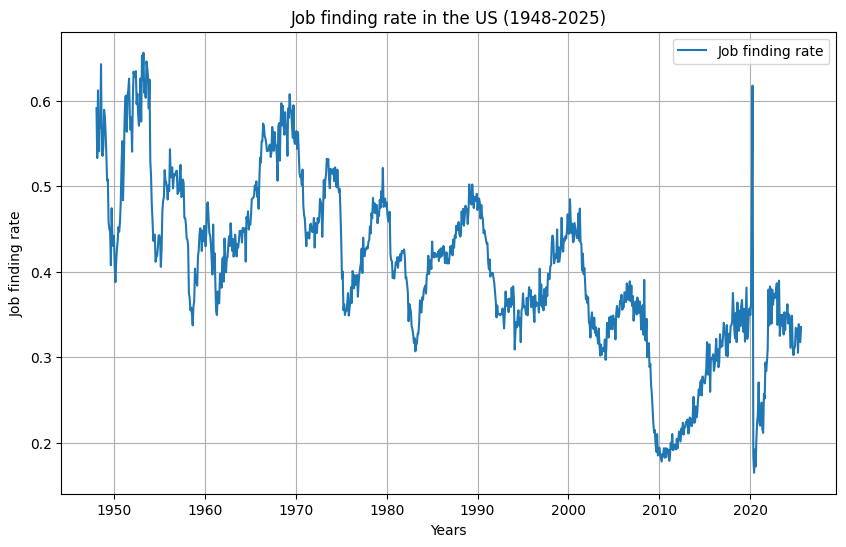

count    931.000000
mean       0.405700
std        0.098814
min        0.164797
25%        0.348065
50%        0.409747
75%        0.467921
max        0.656413
dtype: float64

In [61]:
# Compute the job finding rate 
finding_rate=1-(unemp_total[1:]-unemp_short_term[1:])/unemp_total # Shift the numerator values forward one period to satisfy the formula

# Plot job finding rate 
start, end = "1948", "2025"
plt.figure(figsize=(10, 6))
plt.plot(finding_rate[start:end], label="Job finding rate")

# Title the figure and label the axis
plt.xlabel("Years")
plt.ylabel("Job finding rate")
plt.title("Job finding rate in the US (1948-2025)")
plt.grid(True)
plt.legend()
plt.show()

# Compute descriptive statistics for the job finding rate
finding_rate.describe()

The job finding probability is high, averaging 40.5 percent over the post-war period.  It is also highly variable, dropping by about 20 percent during the Great Recession and similarly high magnitudes during other business cycles.  The Covid period saw a abnormal spike in the finding rate because the stock unemployed (on the denominator) was incredibly high in the immediate aftermath of Covid.  Finally, the job finding rate tends to be procyclical--rising and falling in tandem with the business cycle.

Now we turn to the job separation rate in order to measure E2U transitions.  There are two ways of measuring this:
1. <a href="https://www.bls.gov/jlt/" target="_blank">JOLTS</a> provides a direct measure of total monthly separations reported by employers.  These include any reason a worker leaves a job: voluntary quits and involuntary layoffs.  This data series is available on FRED under the ID `JTSTSL`.  JOLTS also directly computes a separation rate by simply dividing the number of separations by total employment.  The resulting series is called `JTSTSR` on FRED.  
2. Use the law of motion for unemployment with the job finding rate to find the separation $s$.  That is, given data on unemployment, employment, and the job finding rate find the value of $s_t$ which satisfies $\mathcal{U}_{t+1}-\mathcal{U}_t=s_t\mathcal{E}_t-f_t\mathcal{U}_t$ exactly.  This is the approach used by <a href="[https://www.bls.gov/cps/" target="_blank](https://www.aeaweb.org/articles?id=10.1257/0002828053828572)">Shimer (2005)</a>.

We can compute and plot the separation rate using both methods.

In [ ]:
import pandas as pd
from fredapi import Fred

fred = Fred(api_key='9c70445138df124be4928605b7e08bd4')
sep_rate_jolts=fred.get_series('JTSTSR')/100 # Number of person unemployed; correct units for comparability with the Shimer method series
emp_total=fred.get_series('PAYEMS')

In [ ]:
# Compute the separation rate using the Shimer method

sep_rate_shimer=(unemp_total[1:]-unemp_total*(1-finding_rate))/emp_total

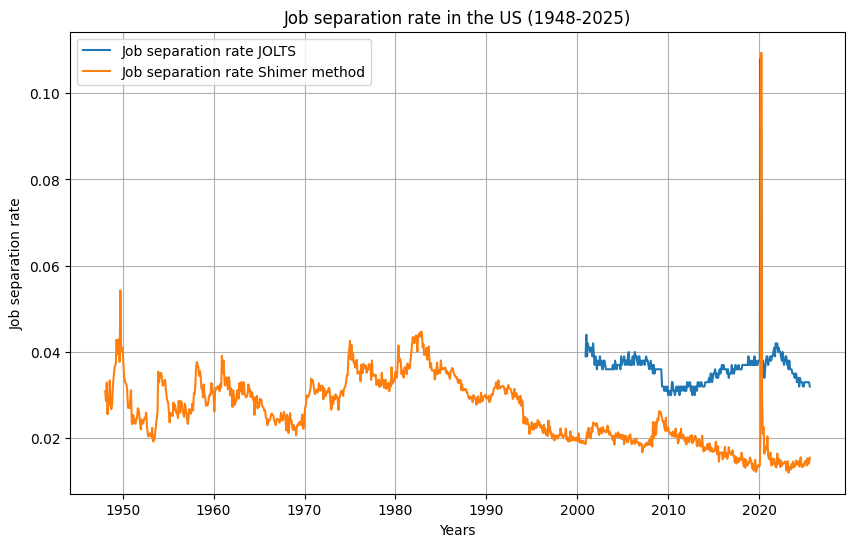

count    931.000000
mean       0.026231
std        0.007963
min        0.012028
25%        0.020224
50%        0.025705
75%        0.031740
max        0.109359
dtype: float64

In [77]:
# Plot job finding rate 
start, end = "1948", "2025"
plt.figure(figsize=(10, 6))
plt.plot(sep_rate_jolts[start:end], label="Job separation rate JOLTS")
plt.plot(sep_rate_shimer[start:end], label="Job separation rate Shimer method")

# Title the figure and label the axis
plt.xlabel("Years")
plt.ylabel("Job separation rate")
plt.title("Job separation rate in the US (1948-2025)")
plt.grid(True)
plt.legend()
plt.show()

# Descriptive statistics
sep_rate_jolts.describe()
sep_rate_shimer.describe()

The separation rate is much lower than the finding rate averaging 3.6 percent for the JOLTS series and 2.6 percent for the Shimer series.  Also, the separation rate is much less variable than the finding rate over the business cycle. 